# DS3000 - Assignment 3

## Grade: /100 + 25 Bonus


* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.



This notebook contains the questions for Assignment 3.

Make sure to complete this assignment individually and appropriately reference all external code and documentation used. 

## Preliminaries


In [1]:
## Import libraries
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk 
import scipy 
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, RocCurveDisplay
from scipy.stats import norm

## Dataset

This dataset ("DataSet") is a subset of a dataset which contains years of daily observations of the weather at many geographical locations across a country.

The main purpose of the dataset is to predict Raining on a day as a "Yes" or "No". 
When the rain is 1 mm or more the answer is "Yes", and "No" otherwise. 
The Observations are drawn from numerous weather stations. 

The variables are ientified as follows:

1. Date - The date string of the recorded information (year-month-day) 
2. MinTemp - Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
3. MaxTemp - Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
4. Rainfall - Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre (millimetres).
5. Evaporation - "Class A" pan evaporation in the 24 hours to 9am (milimeters).
6. Sunshine - Bright sunshine in the 24 hours to midnight (hours).
7. WindGustSpeed - Speed of strongest wind gust in the 24 hours to midnight (killometers per hour).
8. WindDir - Direction of strongest wind gust in the 24 hours to midnight (4 compass points North, South, East, West).
9. WindSpeed9am - Wind speed averaged over 10 minutes prior to 9 am (killometers per hour).
10. WindSpeed3am - Wind speed averaged over 10 minutes prior to 3 pm (killometers per hour).
11. Humidity - Relative humidity (percent).
12. Pressure9am - Atmospheric pressure reduced to mean sea level at 9 am (hectopascals).
13. Pressure3pm - Atmospheric pressure reduced to mean sea level at 3 pm (hectopascals).
14. Cloud9am - Fraction of sky obscured by cloud at 9 am (eighths).
15. Cloud3pm - Fraction of sky obscured by cloud at 3 pm (eighths).
16. Temp9am - Temperature at 9 am (degrees Celsius).
17. Temp3pm - Temperature at 3 pm (degrees Celsius).
18. RainToday - Raining today ("Yes"/"No").
19. RainTomorrow - Raining tomorrow ("Yes"/"No").




## Question 1: Linear Regression - Predicting the amount of Rainfall (65 pts)

### Q1.1: Data loading (6 pts)

Load the dataset and store it in a dataframe. Preview the basic statistics for all variables. 


In [2]:
df = pd.read_csv('DataSet.csv')
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,13.414333,23.428335,4.402867,5.105072,7.054686,43.628445,17.275634,20.678060,53.879824,1016.186880,1013.828115,4.558986,4.697905,17.774862,21.857552
std,6.417740,7.261593,11.423447,3.410964,3.962936,14.703012,8.924449,8.995093,21.092195,7.214124,7.111339,2.833417,2.662640,6.692285,7.187933
min,-2.500000,7.200000,0.000000,0.000000,0.000000,15.000000,2.000000,2.000000,1.000000,988.300000,987.300000,0.000000,0.000000,3.200000,4.800000
25%,8.600000,17.200000,0.000000,2.600000,3.800000,33.000000,11.000000,13.000000,39.000000,1011.300000,1008.900000,2.000000,2.000000,12.100000,15.900000
50%,12.900000,23.500000,0.000000,4.400000,7.800000,41.000000,17.000000,20.000000,55.000000,1016.100000,1013.800000,6.000000,6.000000,17.100000,21.700000
75%,18.500000,29.500000,4.200000,7.000000,10.300000,52.000000,22.000000,26.000000,68.000000,1021.250000,1018.850000,7.000000,7.000000,23.200000,27.550000
max,29.700000,42.900000,168.400000,22.800000,13.800000,100.000000,59.000000,54.000000,100.000000,1038.800000,1036.600000,8.000000,8.000000,39.000000,41.400000


### Q 1.2: Preprocessing (14 pts)
* Drop the variables: 'RainToday','RainTomorrow'.

* Use "Date" variable to find the numerical variable 'Month'. Therefore, you will have an additional column 'Month'. Then dummmy code "Month" and drop the variable "Date". 
* Find all other catecorical variables and Dummy code them (One Hot Encoding) and drop the first column for each variable.

<b>Written answer</b>: How many new variables have you just created?  

In [3]:
df = df.drop(columns=['RainToday', 'RainTomorrow'])

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df = pd.get_dummies(df, columns=['Month'], prefix='Month', drop_first=True)
df = df.drop(columns=['Date'])
df = pd.get_dummies(df, columns=['WindDir'], prefix='WindDir', drop_first=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity,Pressure9am,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WindDir_N,WindDir_S,WindDir_W
0,20.4,26.9,7.0,6.8,5.2,50,17,20,81,1019.3,...,False,False,False,False,True,False,False,False,True,False
1,23.4,33.6,56.0,7.4,8.3,56,7,22,55,1010.1,...,False,False,False,False,False,True,False,False,True,False
2,8.7,12.2,7.8,0.4,0.6,24,7,9,91,1014.5,...,False,True,False,False,False,False,False,False,False,False
3,23.1,25.3,25.8,3.6,0.3,41,15,22,92,1011.8,...,False,False,False,False,False,False,False,False,True,False
4,12.8,15.6,27.2,3.2,0.0,31,9,24,80,1024.9,...,True,False,False,False,False,False,False,False,False,False


<b>*Written answer:*</b> I have created 16 new variables. (months 1-12 & 4 wind directions)

### Q 1.3: Visualization (6 pts)

Plot the joint distribution between the Rainfall and the MinTemp and show the marginal distributions of those two variables in the plot as well. 

<b>Written answer</b>: How would you characterize the distribution of `Rainfall`? Describe the relationship between those two variables.  

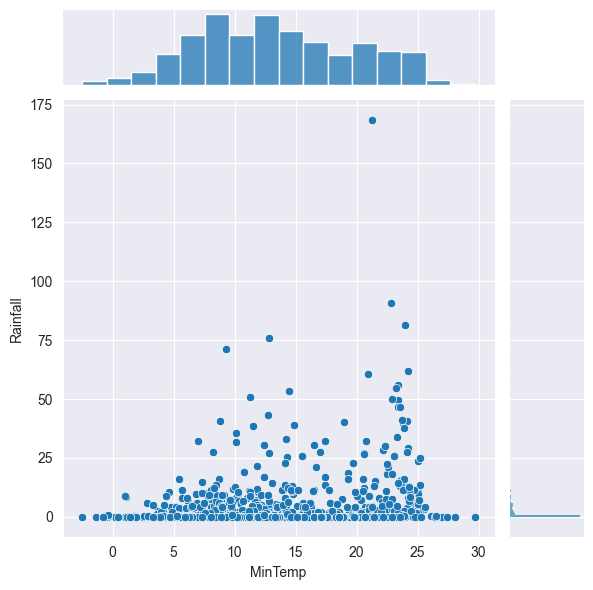

In [4]:
sns.jointplot(x='MinTemp', y='Rainfall', data=df, kind='scatter')
plt.show()

<b>*Written answer:*</b> The distribution of Rainfall appears to be positively skewed, indicating that there are a higher number of instances with lower rainfall. As for the relationship between Rainfall and MinTemp, it appears to be non-linear.

### Q 1.4 Transformation (14 pts) 

Logarithm transformation is one of the most commonly used mathematical transformations in feature engineering to approximate the distribution close to normal. Given the distribution of the Rainfall variable, use the logarithm of the Rainfall instead of the original variable as a new target variable and add to the dataset (name it ```LogRainfall```) where $LogRainfall = log(Rainfall + 1)$. (You add 1 because the data you apply log transform must have only positive values).  

Plot the joint distribution of the new variable ```LogRainfall``` and the MinTemp. 

<b>Written answer</b>: Describe how their correlation is changed now and how this transformation was effective. 

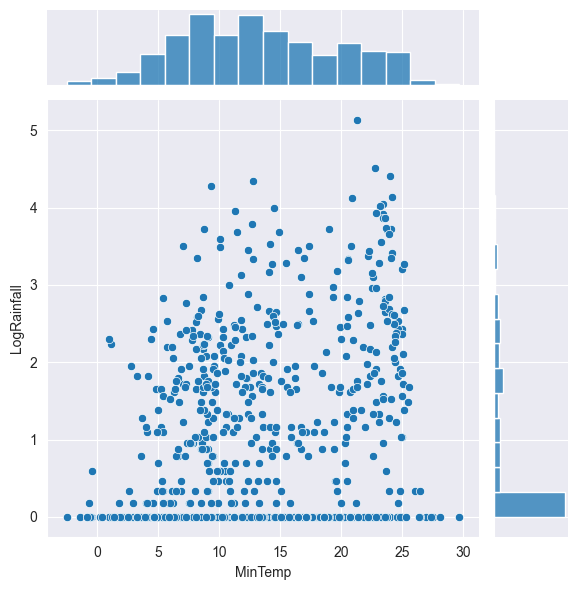

In [5]:
df['LogRainfall'] = np.log(df['Rainfall'] + 1)
sns.jointplot(x='MinTemp', y='LogRainfall', data=df, kind='scatter')
plt.show()

<b>*Written answer:*</b> The log-transformed data makes the graph more spread out in order to keep the outliers closer to the mean.

### Q 1.5: Regression Analysis  (25 pts) 

Use the above two target variables ```Rainfall``` and ```LogRainfall``` to create **two** linear regression models and compare their prediction performance as follows:

a) Split the train and test subsets using 30% of the data as the test set. Use a `random_state` of 1 if using `train_test_split`. 

b. Create the first linear regression model using all variables as features ```X``` and the Rainfall variable as target variable ```y``` without transformation. 

c. Create the second linear regression model using all variables as features ```X``` and the log-transformed Rainfall variable ```y``` . 

d. Calculate and report the **mean absolute error** of both models when predicting the variable `Rainfall` in the test set. 
*NOTE* Make sure you transform the prediction of the model in (c) from log(Rainfall) to Rainfall before error calculation! 

**Written answer:** Which one is the most accurate model? Why? 

In [6]:
X1 = df.drop(columns=['Rainfall', 'LogRainfall'])
y1 = df['Rainfall']

X2 = df.drop(columns=['Rainfall', 'LogRainfall'])
y2 = df['LogRainfall']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

model1 = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', LinearRegression())
])
model1.fit(X1_train, y1_train)

model2 = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', LinearRegression())
])
model2.fit(X2_train, y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = np.expm1(model2.predict(X2_test))

mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(np.expm1(y2_test), y2_pred)

print(f'Mean absolute error model 1: {mae1}')
print(f'Mean absolute error model 2: {mae2}')

Mean absolute error model 1: 5.611782521352506
Mean absolute error model 2: 4.059520959032491


<b>*Written answer:*</b> The log-transformed model is better, the is because log-transformation helps with outliers and if the relationship between the variables is not inherently linear.

## Question 2: Regularized model (35 points)

In this question we will build a reqularized regression model and observe the effect of regularization. **Evaporation** will be used as target variable.

### Q 2.1  (10 pts) 
Reload the original dataset again.
Use the `Date` variable to extract `Month` numerical variable. 
Repeat the preprocessing in Q 1.2 but do NOT dummy code month and keep it as one numerical column. 


In [7]:
df = pd.read_csv('DataSet.csv')
df = df.drop(columns=['RainToday', 'RainTomorrow'])
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df = df.drop(columns=['Date'])
df = pd.get_dummies(df, columns=['WindDir'], prefix='WindDir', drop_first=True)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,WindDir_N,WindDir_S,WindDir_W
0,20.4,26.9,7.0,6.8,5.2,50,17,20,81,1019.3,1016.3,7,7,23.4,23.5,10,False,True,False
1,23.4,33.6,56.0,7.4,8.3,56,7,22,55,1010.1,1006.4,7,7,30.0,32.8,11,False,True,False
2,8.7,12.2,7.8,0.4,0.6,24,7,9,91,1014.5,1009.2,8,7,9.8,11.6,7,False,False,False
3,23.1,25.3,25.8,3.6,0.3,41,15,22,92,1011.8,1009.4,7,8,24.3,23.9,4,False,True,False
4,12.8,15.6,27.2,3.2,0.0,31,9,24,80,1024.9,1022.9,8,8,14.2,13.9,6,False,False,False


### Q 2.2  (5 pts) 
Fourier Transform is a reasonable option to encode periodic data. 

Write a function `FourierExpansion(x,order)`, which takes a variable `x` scaled between 0 and 1 (scale by dividing to the maximum value), and returns a design matrix that has order times 2 columns. The first 2 columns should be set to: 

$sin(2 \pi x)$

$cos(2 \pi x)$

The next two columns: 

$sin(4 \pi x)$

$cos(4 \pi x)$

$...$

and the last two columns: 

$sin(2 order \pi x)$

$cos(2 order \pi x)$


In [8]:
def FourierExpansion(x, order):
    x = x / np.max(x)
    design_matrix = np.zeros((len(x), 2 * order))
    
    for i in range(order):
        design_matrix[:, 2 * i] = np.sin(2 * (i + 1) * np.pi * x)
        design_matrix[:, 2 * i + 1] = np.cos(2 * (i + 1) * np.pi * x)
        
    return design_matrix


### Q 2.3  (20 pts) 
Now generate two different design matrices (models) to model the variation of `Evaporation` across the `Month` of the year. 
* Model 1: use your function from Question 2.2 to generate a Fourier set (order 6) for month. Make sure you scale month between 0 and 1 before submitting to the function. Remove column 2 after fourier expansion.
* Model 2: use `pd.get_dummies` to generate a dummy or one-hot encoding of Month. Because we will use this for an unregualized model, make sure you drop the first column.

Fit the two unregularized linear model to the data and report the the $R^2$ value for 
both models. If you have done everything correctly, the $R^2$ values should be identical. Why is this?  

In [9]:
design_matrix_1 = FourierExpansion((df['Month'] / 12), 6)
design_matrix_1 = np.delete(design_matrix_1, 1, 1)

model3 = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', Ridge())
])
model3.fit(design_matrix_1, df['Evaporation'])

month_dummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
model4 = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', Ridge())
])
model4.fit(month_dummies, df['Evaporation'])

y3_pred = model3.predict(design_matrix_1)
y4_pred = model4.predict(month_dummies)

score1 = r2_score(df['Evaporation'], y3_pred)
score2 = r2_score(df['Evaporation'], y4_pred)

print(f'Model 1 r2: {score1}')
print(f'Model 2 r2: {score2}')

Model 1 r2: 0.36459211004261494
Model 2 r2: 0.36627100395591106


<b>*Written answer:*</b> After the data is manipulated, it'll be very similar, and both model are the same, meaning that it will fit similarly.

### Q 2.4 (25 Bonus pts)
a) Modify your dummy encoding model (Model 2 from Q2.3), by **NOT dropping** the first column. This design matrix should have 12 regressors now. 

b) Build a pipeline, which first applies z-Standardization to each column of the design matrix and then fit an L2-regularlized linear model.

c) Do a grid search, varying the regularization parameter between $exp(-5)$ and $exp(4)$ in 10 steps for the fourier-encoded model, (Model 1 from Q2.3). Evaluate each setting of $\lambda$ using the mean-squared-error with 10-fold cross-validation. Plot the average validation error (y-axis) against $log(\lambda)$ (x-axis). (*Hint: If you did not succeed in generating a fourier feature set, use `polynomialFeatures` to make a polynomial feature set for month of order 11.*) 

d) Repeat (c), this time using the dummy-coded feature set (modified Model 2 from Q2.3, in part a of this question). Plot the average validation error with a different color in the same plot as part (c), so you can compare the models. 

e) Report the $\lambda$ value for each model that gives the best validation error. 

**Written answer:** Why don't the two models behave the same way, as they did in Q2.3? 

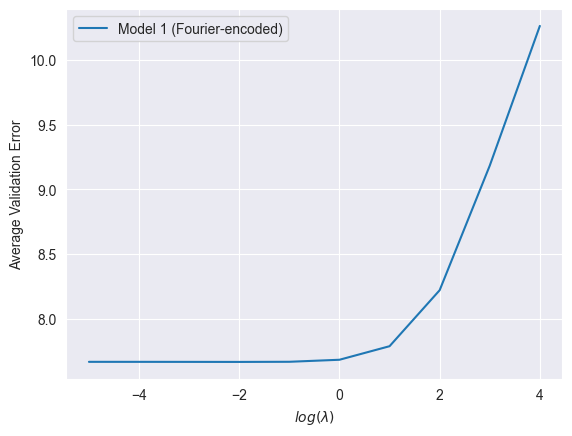

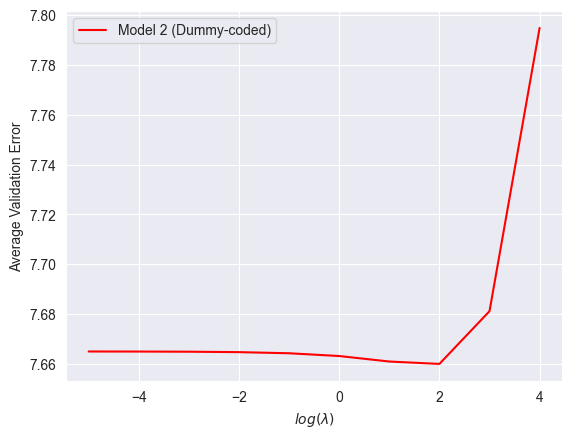

Best Lambda for Model 1 (Fourier-encoded): 0.1353352832366127
Best Lambda for Model 2 (Dummy-coded): 7.38905609893065


In [10]:
month_dummies_2 = pd.get_dummies(df['Month'], prefix='Month', drop_first=False)

ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', Ridge())
])
ridge_model.fit(month_dummies_2, df['Evaporation'])

param_grid = {'classifier__alpha': np.exp(np.linspace(-5, 4, 10))}
grid_search = GridSearchCV(model3, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(design_matrix_1, df['Evaporation'])
results = grid_search.cv_results_
average_validation_error = -results['mean_test_score']

log_lambda = np.log(param_grid['classifier__alpha'])
plt.plot(log_lambda, average_validation_error)
plt.xlabel('$log(\lambda)$')
plt.ylabel('Average Validation Error')
plt.legend(['Model 1 (Fourier-encoded)'])
plt.show()

grid_search_2 = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_2.fit(month_dummies, df['Evaporation'])
results_2 = grid_search_2.cv_results_
average_validation_error_2 = -results_2['mean_test_score']
plt.plot(log_lambda, average_validation_error_2, label='Model 2 (Dummy-coded)', color='red')
plt.xlabel('$log(\lambda)$')
plt.ylabel('Average Validation Error')
plt.legend(['Model 2 (Dummy-coded)'])
plt.show()

best_lambda_model1 = grid_search.best_params_['classifier__alpha']
best_lambda_model2 = grid_search_2.best_params_['classifier__alpha']

print(f'Best Lambda for Model 1 (Fourier-encoded): {best_lambda_model1}')
print(f'Best Lambda for Model 2 (Dummy-coded): {best_lambda_model2}')

**Written answer:** Because the data has changed for one making the model adjust 